## Model Training

- Single Layer LSTM
- Multiple Layers LSTM
- LSTM with Attention

## Activation Experiment

Test on 4 activation functions in LSTM, including:

- sigmoid
- tanh
- relu
- linear

In [2]:
import seaborn as sns
import pickle as pkl
from matplotlib import pyplot as plt

from data import *
from lstm_model import *

# Set plotting style
sns.set_style('whitegrid')
sns.set_palette('Set2')


In [3]:
# Get confirmed cases dataset
dataset, dataset_rolling = get_dataset_confirmed()
# Print loss of different activations
model_type = 'single_layer_lstm'
activations = ['sigmoid', 'tanh', 'linear', 'relu']
for activation in activations:
    configs = {
        'dataset': dataset_rolling,
        'model_path': f"./models/{model_type}_confirmed_{activation}",
        'model_type': model_type,
        'activation': activation,
    }
    model = LSTMModel(**configs)
    model.read_model()
    # model.plot(f'Confirmed Cases Forcasting with Activation: {activation}')
    model.evaluate()

13/13 [==============================] - 0s 2ms/step - loss: 0.9586


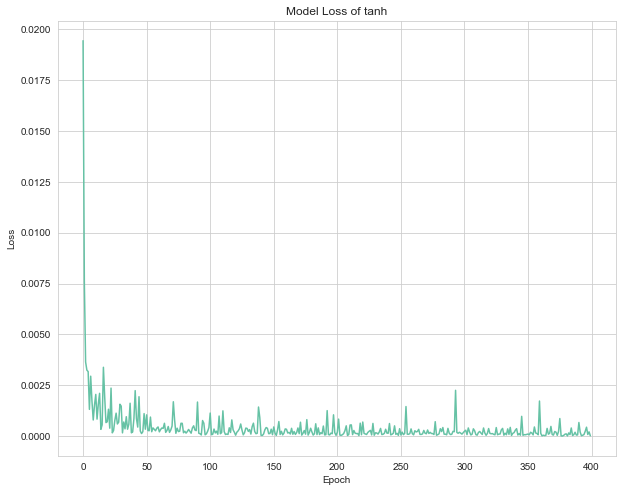

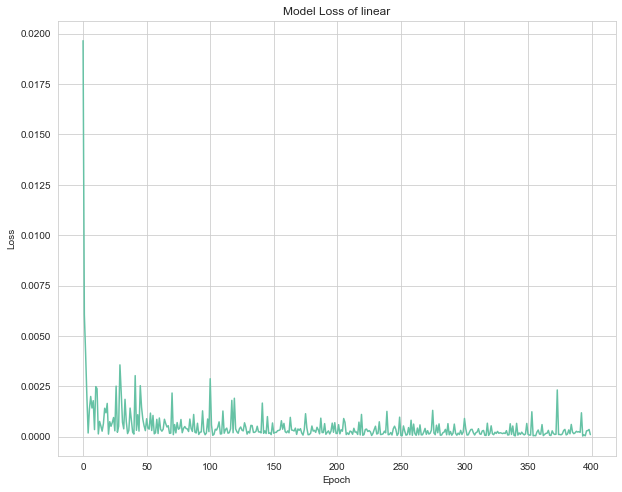

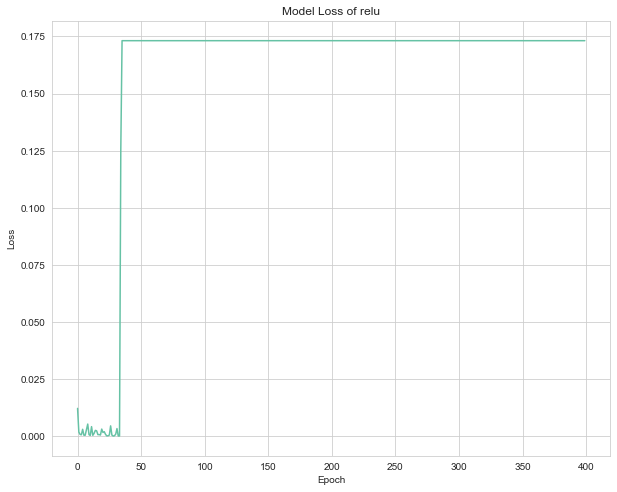

In [18]:
import pickle

activations = [ 'tanh', 'linear', 'relu']
# Print loss of different activations
for activation in activations:
    history_path = f"./models/{model_type}_confirmed_{activation}/history.pkl"
    history_file = open(history_path, 'rb')
    history = pickle.load(history_file)

    plt.figure(figsize=(10, 8))
    plt.plot(history['loss'])
    plt.title(f'Model Loss of {activation}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    # plt.legend(['Loss'], loc='upper left')
    plt.show()

## Forcasting Google Trends

In [20]:
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events
from bayes_opt.util import load_logs

def train(dropout, output_dim):
    # Get confirmed cases dataset
    output_dim = int(output_dim)
    _, ds_rolling = get_dataset_confirmed()
    # Model types to be tested
    model_type = 'multi_layer_lstm'
    
    configs = {
        'dataset': ds_rolling,
        'model_type': model_type,
        'dropout': dropout,
        'output_dim': output_dim,
        'epochs': 10,
    }
    print(f'Start training {model_type}')
    model = LSTMModel(**configs)
    model.construct_model()
    model.train()
    return model.evaluate()


pbounds = {
    'dropout': (0.0, 0.20),
    'output_dim': (64, 256),
}
optimizer = BayesianOptimization(
    f=train,
    pbounds=pbounds,
    random_state=1,
)
load_logs(optimizer, logs=["./logs.json"]);


In [39]:
i = 0
for res in optimizer.res:
    res['target'] = format(res['target'], '.4f')
    res['params']['dropout'] = format(res['params']['dropout'], '.2f')
    res['params']['output_dim']=  format(res['params']['output_dim'], '.2f')
    print(f"| {i} |  {res['target']}  | {res['params']['dropout']} | {res['params']['output_dim']} |")
    i += 1

| 0 |  0.2625  | 0.08 | 202.30 |
| 1 |  0.0059  | 0.00 | 122.05 |
| 2 |  0.0714  | 0.03 | 81.73 |
| 3 |  0.0097  | 0.04 | 130.35 |
| 4 |  0.0219  | 0.08 | 167.45 |
| 5 |  0.0244  | 0.10 | 203.17 |
| 6 |  0.0028  | 0.01 | 81.75 |
| 7 |  0.0602  | 0.03 | 184.73 |
| 8 |  0.0085  | 0.02 | 209.67 |
| 9 |  0.0045  | 0.08 | 95.00 |
| 10 |  0.0629  | 0.18 | 149.86 |
| 11 |  0.0171  | 0.09 | 131.59 |
| 12 |  0.0117  | 0.12 | 139.43 |
| 13 |  0.0042  | 0.11 | 198.79 |
| 14 |  0.0075  | 0.03 | 142.08 |
| 15 |  0.0042  | 0.01 | 166.58 |
| 16 |  0.0035  | 0.07 | 116.78 |
| 17 |  0.0032  | 0.04 | 193.30 |
| 18 |  0.0049  | 0.18 | 143.88 |
| 19 |  0.0007  | 0.03 | 195.35 |


In [38]:
optimizer.res

[{'target': 0.26253873109817505,
  'params': {'dropout': 0.08340440094051481,
   'output_dim': 202.30230274089436}},
 {'target': 0.005888551007956266,
  'params': {'dropout': 2.2874963468977327e-05,
   'output_dim': 122.04785394531324}},
 {'target': 0.07144118845462799,
  'params': {'dropout': 0.02935117816342261, 'output_dim': 81.72901019560918}},
 {'target': 0.009711110033094883,
  'params': {'dropout': 0.037252042275534185,
   'output_dim': 130.34765959226516}},
 {'target': 0.021922294050455093,
  'params': {'dropout': 0.07935349484613399,
   'output_dim': 167.45281292864453}},
 {'target': 0.024385031312704086,
  'params': {'dropout': 0.10160007205847794,
   'output_dim': 203.17140833428542}},
 {'target': 0.0028158542700111866,
  'params': {'dropout': 0.012191820847425894,
   'output_dim': 81.74583554228872}},
 {'target': 0.06023344025015831,
  'params': {'dropout': 0.029861342634745915,
   'output_dim': 184.73185868853042}},
 {'target': 0.008513337932527065,
  'params': {'dropout':